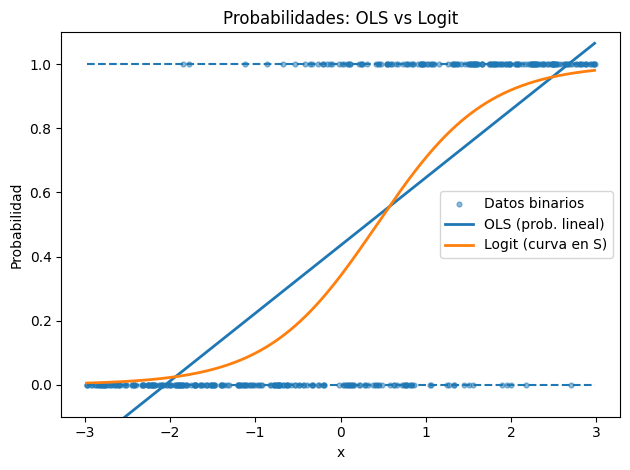

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# Simulación
rng = np.random.default_rng(7)
n = 400
x = np.sort(rng.uniform(-3, 3, size=n)).reshape(-1, 1)
beta0, beta1 = -0.5, 1.3
p = 1 / (1 + np.exp(-(beta0 + beta1 * x.ravel())))
y = rng.binomial(1, p)

# Ajustes: OLS y Logit
ols = LinearRegression().fit(x, y)
logit = LogisticRegression().fit(x, y)

xg = np.linspace(x.min(), x.max(), 400).reshape(-1, 1)
p_ols = ols.predict(xg)               # puede quedar fuera de [0,1]
p_log = logit.predict_proba(xg)[:, 1] # siempre en [0,1]

plt.figure()
plt.scatter(x, y, s=12, alpha=0.5, label='Datos binarios')
plt.plot(xg, p_ols, label='OLS (prob. lineal)', linewidth=2)
plt.plot(xg, p_log, label='Logit (curva en S)', linewidth=2)
plt.hlines([0,1], xmin=xg.min(), xmax=xg.max(), linestyles='dashed')
plt.ylim(-0.1, 1.1)
plt.xlabel('x'); plt.ylabel('Probabilidad')
plt.title('Probabilidades: OLS vs Logit')
plt.legend()
plt.tight_layout()
plt.show()


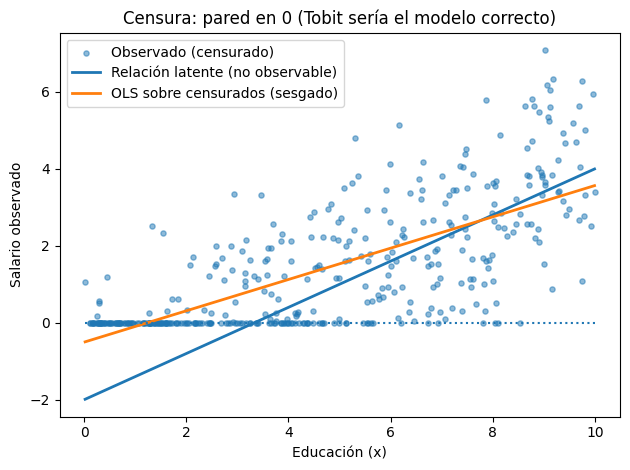

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

rng = np.random.default_rng(11)
n = 400
x = rng.uniform(0, 10, n)
beta0, beta1 = -2.0, 0.6
u = rng.normal(0, 1.5, n)
w_star = beta0 + beta1 * x + u            # salario latente
w_obs = np.maximum(0, w_star)             # censura en 0

# OLS sobre observados (mal especificado si hay censura)
ols = LinearRegression().fit(x.reshape(-1,1), w_obs)

# Curvas
xg = np.linspace(x.min(), x.max(), 300)
ols_line = ols.predict(xg.reshape(-1,1))
true_line = beta0 + beta1 * xg

plt.figure()
plt.scatter(x, w_obs, s=14, alpha=0.5, label='Observado (censurado)')
plt.plot(xg, true_line, linewidth=2, label='Relación latente (no observable)')
plt.plot(xg, ols_line, linewidth=2, label='OLS sobre censurados (sesgado)')
plt.hlines(0, xmin=xg.min(), xmax=xg.max(), linestyles='dotted')
plt.xlabel('Educación (x)'); plt.ylabel('Salario observado')
plt.title('Censura: pared en 0 (Tobit sería el modelo correcto)')
plt.legend()
plt.tight_layout()
plt.show()


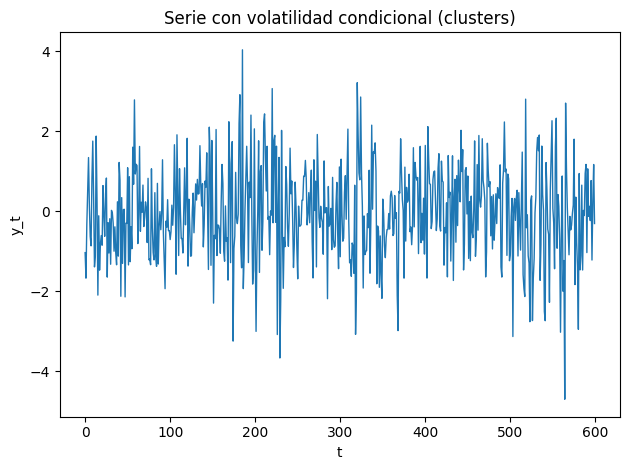

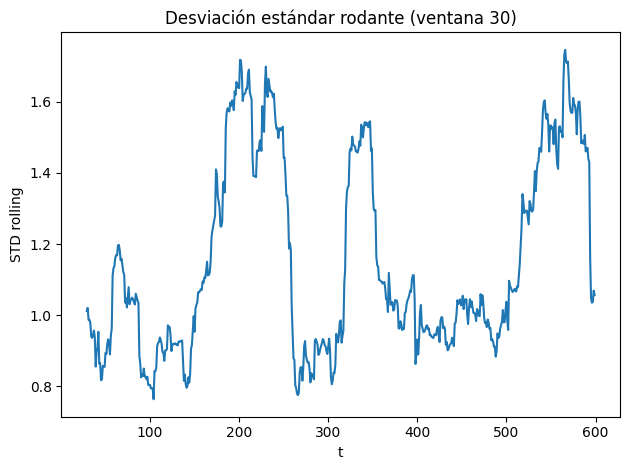

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

rng = np.random.default_rng(5)
T = 600
eps = np.zeros(T)
sigma2 = np.zeros(T)

# Simple simulación GARCH(1,1)
omega, alpha, beta = 0.1, 0.12, 0.82
sigma2[0] = omega / (1 - alpha - beta)
eps[0] = rng.normal(0, np.sqrt(sigma2[0]))
for t in range(1, T):
    sigma2[t] = omega + alpha * eps[t-1]**2 + beta * sigma2[t-1]
    eps[t] = rng.normal(0, np.sqrt(sigma2[t]))

y = eps  # serie con volatilidad condicional
roll = pd.Series(y).rolling(30).std()

plt.figure()
plt.plot(y, linewidth=1)
plt.title('Serie con volatilidad condicional (clusters)')
plt.xlabel('t'); plt.ylabel('y_t')
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(roll, linewidth=1.5)
plt.title('Desviación estándar rodante (ventana 30)')
plt.xlabel('t'); plt.ylabel('STD rolling')
plt.tight_layout()
plt.show()


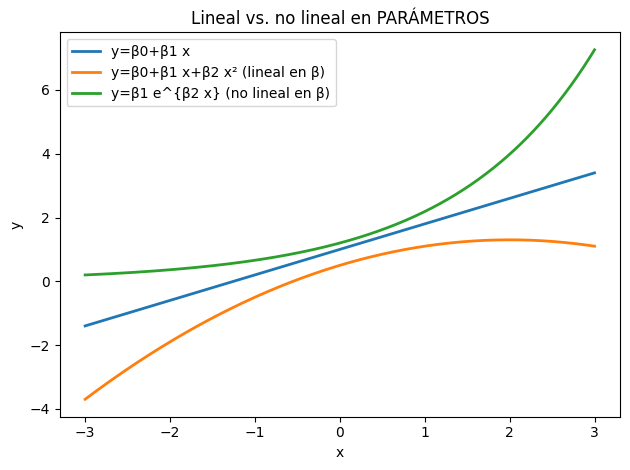

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 400)
# Lineal en parámetros (recta y polinomio)
y_lin = 1.0 + 0.8*x
y_poly = 0.5 + 0.8*x - 0.2*x**2
# No lineal en parámetros (exponencial)
b1, b2 = 1.2, 0.6
y_exp = b1 * np.exp(b2 * x)

plt.figure()
plt.plot(x, y_lin, linewidth=2, label='y=β0+β1 x')
plt.plot(x, y_poly, linewidth=2, label='y=β0+β1 x+β2 x² (lineal en β)')
plt.plot(x, y_exp, linewidth=2, label='y=β1 e^{β2 x} (no lineal en β)')
plt.xlabel('x'); plt.ylabel('y')
plt.title('Lineal vs. no lineal en PARÁMETROS')
plt.legend()
plt.tight_layout()
plt.show()
